# Pacakge importing

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Generation

In [2]:
n_samples = 100
d_dim = 1

X = np.arange(0, n_samples, 1)

mean = 0
var = 3
e = np.random.normal(mean, var, n_samples)

def f(X):
    B = np.array([2,3])
    return (X @ B)

X = np.concatenate([np.ones(n_samples)[:,None], X[:,None]], axis=1)
Y = f(X) + e

Text(0, 0.5, 'Output Data')

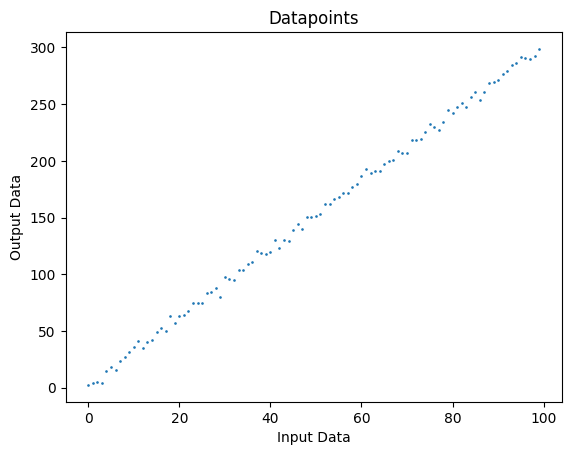

In [3]:
plt.figure()
plt.scatter(X[:,1], Y, s=0.8)
plt.title("Datapoints")
plt.xlabel("Input Data")
plt.ylabel("Output Data")

# Seperate and standardize the data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

mean = X_train[:,1:].mean()
var = X_train[:,1:].std()

def normalie(X, mean, std):
    return (X -  mean)/std

X_train_norm = X_train.copy()
X_train_norm[:,1:] =normalie(X_train_norm[:,1:], mean, var)

X_test_norm = X_test.copy()
X_test_norm[:,1:] =normalie(X_test_norm[:,1:], mean, var)

# $\beta$  estimation with closed-form solution

In [71]:
def estimate_parameters(X, Y):
    B_est =np.linalg.solve(X.T @ X, X.T @ Y) # np.linalg.inv(X.T @ X) @ X.T @ Y
    return B_est

def estimate_parameters_ridge(X, Y, a):
    Id = a * np.eye(d_dim, d_dim)
    B_est = np.linalg.solve(X.T @ X + Id, X.T @ Y) #np.linalg.inv(X.T @ X + Id) @ X.T @ Y
    return B_est

B_est = estimate_parameters_ridge(X_train, y_train, 5)
Y_train_est = X_train @ B_est
Y_test_est = X_test @ B_est

# $\beta$ estimation with gradient descent

In [74]:
def mse(y, y_est):
    return float(np.mean((y - y_est)**2))

L_error = []

def gradient_descent(X, y, lr = 0.1,e = 30, max_step = 10e3):
    B = np.ones(d_dim + 1)
    count_step = 0
    while mse(y, X @ B) >= e and count_step < max_step:
        #L_error.append(np.linalg.norm(B))
        gradient = (1/X.shape[0])* lr *-2 * X.T @ (y - X @ B) 
        B -= gradient
        count_step += 1
    if count_step == max_step:
        raise RuntimeError("There was no convergence")
    return B


B_est = gradient_descent(X_train_norm, y_train)
Y_train_est = X_train_norm @ B_est
Y_test_est = X_test_norm @ B_est

# Evaluating model performance

In [67]:
def mse(y, y_est):
    return float(np.mean((y - y_est)**2))

def R2(y, y_est):
    mean_vect = np.ones(y.shape[0])
    mean_vect = np.mean(y) * mean_vect
    remaining_var =  np.mean((y - y_est)**2)
    true_var = np.mean((y - mean_vect)**2)
    return float(1 - remaining_var / true_var)

MSE : 11.106461735730965
R2 score: 0.9983987859589558


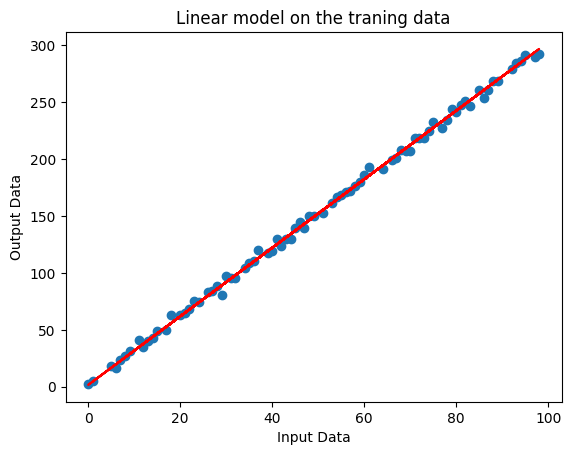

In [72]:
plt.figure()
plt.scatter(X_train[:,1], y_train)
plt.plot(X_train[:,1], Y_train_est, color= "red")
plt.title("Linear model on the traning data")
plt.xlabel("Input Data")
plt.ylabel("Output Data")

print(f"MSE : {mse(y_train, Y_train_est)}")
print(f"R2 score: {R2(y_train, Y_train_est)}")


MSE : 24.034004999690858
R2 score: 0.9975501954380667


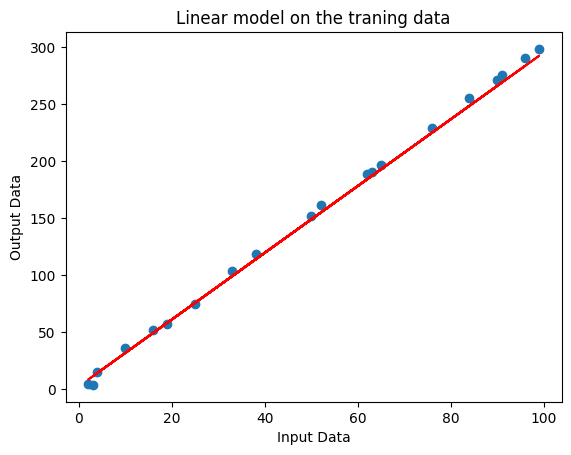

In [75]:
plt.figure()
plt.scatter(X_test[:,1], y_test)
plt.plot(X_test[:,1], Y_test_est, color= "red")
plt.title("Linear model on the traning data")
plt.xlabel("Input Data")
plt.ylabel("Output Data")


print(f"MSE : {mse(y_test, Y_test_est)}")
print(f"R2 score: {R2(y_test, Y_test_est)}")
